
### Import libraries :




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from tqdm.auto import tqdm

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

####### dt 

from sklearn.tree import DecisionTreeClassifier

###########  rf

from sklearn.ensemble import RandomForestClassifier

########### xgboost

import xgboost as xgb

########### export model

import pickle


### Import DATA :



In [3]:
df = pd.read_csv('heart_attack_prediction_dataset.csv') 

In [4]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


### Uniforming the name of the columns and the string content :

In [5]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [6]:
df.head()

,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,...,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [7]:
df.dtypes

patient_id                          object
age                                  int64
sex                                 object
cholesterol                          int64
blood_pressure                      object
heart_rate                           int64
diabetes                             int64
family_history                       int64
smoking                              int64
obesity                              int64
alcohol_consumption                  int64
exercise_hours_per_week            float64
diet                                object
previous_heart_problems              int64
medication_use                       int64
stress_level                         int64
sedentary_hours_per_day            float64
income                               int64
bmi                                float64
triglycerides                        int64
physical_activity_days_per_week      int64
sleep_hours_per_day                  int64
country                             object
continent  

In [8]:
strings=df.dtypes[df.dtypes=='object'].index
strings

Index(['patient_id', 'sex', 'blood_pressure', 'diet', 'country', 'continent',
       'hemisphere'],
      dtype='object')

In [9]:
df[strings].head()

,patient_id,sex,blood_pressure,diet,country,continent,hemisphere
0,BMW7812,Male,158/88,Average,Argentina,South America,Southern Hemisphere
1,CZE1114,Male,165/93,Unhealthy,Canada,North America,Northern Hemisphere
2,BNI9906,Female,174/99,Healthy,France,Europe,Northern Hemisphere
3,JLN3497,Male,163/100,Average,Canada,North America,Northern Hemisphere
4,GFO8847,Male,91/88,Unhealthy,Thailand,Asia,Northern Hemisphere


In [10]:
for s in strings:
    df[s] = df[s].str.lower().str.replace(" ","_")

In [11]:
df[strings].head()

,patient_id,sex,blood_pressure,diet,country,continent,hemisphere
0,bmw7812,male,158/88,average,argentina,south_america,southern_hemisphere
1,cze1114,male,165/93,unhealthy,canada,north_america,northern_hemisphere
2,bni9906,female,174/99,healthy,france,europe,northern_hemisphere
3,jln3497,male,163/100,average,canada,north_america,northern_hemisphere
4,gfo8847,male,91/88,unhealthy,thailand,asia,northern_hemisphere


### Data cleaning and adjustment :





In [12]:
len(df)

8763

In [13]:
blood_pressure = df['blood_pressure'].values

blood_pressure_max = []
blood_pressure_min = []

for i in range(0,len(df)): 
    blood_pressure_max.append(int(blood_pressure[i].split('/')[0]))
    blood_pressure_min.append(int(blood_pressure[i].split('/')[1]))
    
df['blood_pressure_min'] = blood_pressure_min
df['blood_pressure_max'] = blood_pressure_max

In [14]:
blood_pressure[-1],blood_pressure_max[-1],blood_pressure_min[-1]

('138/67', 138, 67)

In [15]:
df.head()

,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,...,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk,blood_pressure_min,blood_pressure_max
0,bmw7812,67,male,208,158/88,72,0,0,1,0,...,31.251233,286,0,6,argentina,south_america,southern_hemisphere,0,88,158
1,cze1114,21,male,389,165/93,98,1,1,1,1,...,27.194973,235,1,7,canada,north_america,northern_hemisphere,0,93,165
2,bni9906,21,female,324,174/99,72,1,0,0,0,...,28.176571,587,4,4,france,europe,northern_hemisphere,0,99,174
3,jln3497,84,male,383,163/100,73,1,1,1,0,...,36.464704,378,3,4,canada,north_america,northern_hemisphere,0,100,163
4,gfo8847,66,male,318,91/88,93,1,1,1,1,...,21.809144,231,1,5,thailand,asia,northern_hemisphere,0,88,91


In [16]:
del df['blood_pressure']

In [17]:
df.head()

,patient_id,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,...,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk,blood_pressure_min,blood_pressure_max
0,bmw7812,67,male,208,72,0,0,1,0,0,...,31.251233,286,0,6,argentina,south_america,southern_hemisphere,0,88,158
1,cze1114,21,male,389,98,1,1,1,1,1,...,27.194973,235,1,7,canada,north_america,northern_hemisphere,0,93,165
2,bni9906,21,female,324,72,1,0,0,0,0,...,28.176571,587,4,4,france,europe,northern_hemisphere,0,99,174
3,jln3497,84,male,383,73,1,1,1,0,1,...,36.464704,378,3,4,canada,north_america,northern_hemisphere,0,100,163
4,gfo8847,66,male,318,93,1,1,1,1,0,...,21.809144,231,1,5,thailand,asia,northern_hemisphere,0,88,91


In [18]:
strings=df.dtypes[df.dtypes=='object'].index
strings

Index(['patient_id', 'sex', 'diet', 'country', 'continent', 'hemisphere'], dtype='object')

In [19]:
df.diet.value_counts()

healthy      2960
average      2912
unhealthy    2891
Name: diet, dtype: int64

In [20]:
columns = df.columns

In [21]:
for col in columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

patient_id
['bmw7812' 'cze1114' 'bni9906' 'jln3497' 'gfo8847']
8763

age
[67 21 84 66 54]
73

sex
['male' 'female']
2

cholesterol
[208 389 324 383 318]
281

heart_rate
[72 98 73 93 48]
71

diabetes
[0 1]
2

family_history
[0 1]
2

smoking
[1 0]
2

obesity
[0 1]
2

alcohol_consumption
[0 1]
2

exercise_hours_per_week
[4.16818884 1.81324162 2.07835299 9.82812959 5.80429882]
8763

diet
['average' 'unhealthy' 'healthy']
3

previous_heart_problems
[0 1]
2

medication_use
[0 1]
2

stress_level
[9 1 6 2 7]
10

sedentary_hours_per_day
[6.61500145 4.96345884 9.46342584 7.64898082 1.51482093]
8763

income
[261404 285768 235282 125640 160555]
8615

bmi
[31.25123273 27.19497335 28.17657068 36.46470429 21.80914418]
8763

triglycerides
[286 235 587 378 231]
771

physical_activity_days_per_week
[0 1 4 3 5]
8

sleep_hours_per_day
[ 6  7  4  5 10]
7

country
['argentina' 'canada' 'france' 'thailand' 'germany']
20

continent
['south_america' 'north_america' 'europe' 'asia' 'africa']
6

hemisphere
['sou

In [22]:
int(df['exercise_hours_per_week'][0])

4

In [23]:
exercise_hours_per_week = []
sedentary_hours_per_day = []

for i in range(0,len(df)): 
    exercise_hours_per_week.append(round(df['exercise_hours_per_week'][i]))
    sedentary_hours_per_day.append(round(df['sedentary_hours_per_day'][i]))
    
df['exercise_hours_per_week'] = exercise_hours_per_week
df['sedentary_hours_per_day'] = sedentary_hours_per_day

In [24]:
columns = df.columns
for col in columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

patient_id
['bmw7812' 'cze1114' 'bni9906' 'jln3497' 'gfo8847']
8763

age
[67 21 84 66 54]
73

sex
['male' 'female']
2

cholesterol
[208 389 324 383 318]
281

heart_rate
[72 98 73 93 48]
71

diabetes
[0 1]
2

family_history
[0 1]
2

smoking
[1 0]
2

obesity
[0 1]
2

alcohol_consumption
[0 1]
2

exercise_hours_per_week
[ 4  2 10  6  1]
21

diet
['average' 'unhealthy' 'healthy']
3

previous_heart_problems
[0 1]
2

medication_use
[0 1]
2

stress_level
[9 1 6 2 7]
10

sedentary_hours_per_day
[7 5 9 8 2]
13

income
[261404 285768 235282 125640 160555]
8615

bmi
[31.25123273 27.19497335 28.17657068 36.46470429 21.80914418]
8763

triglycerides
[286 235 587 378 231]
771

physical_activity_days_per_week
[0 1 4 3 5]
8

sleep_hours_per_day
[ 6  7  4  5 10]
7

country
['argentina' 'canada' 'france' 'thailand' 'germany']
20

continent
['south_america' 'north_america' 'europe' 'asia' 'africa']
6

hemisphere
['southern_hemisphere' 'northern_hemisphere']
2

heart_attack_risk
[0 1]
2

blood_pressure_min

In [25]:
int(df['income'][90]/1000)

199

In [26]:
income_30k = []

for i in range(0,len(df)): 
    income_30k.append(int(df['income'][i]/30000))
    
df['income_30k'] = income_30k

In [27]:
columns = df.columns
for col in columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

patient_id
['bmw7812' 'cze1114' 'bni9906' 'jln3497' 'gfo8847']
8763

age
[67 21 84 66 54]
73

sex
['male' 'female']
2

cholesterol
[208 389 324 383 318]
281

heart_rate
[72 98 73 93 48]
71

diabetes
[0 1]
2

family_history
[0 1]
2

smoking
[1 0]
2

obesity
[0 1]
2

alcohol_consumption
[0 1]
2

exercise_hours_per_week
[ 4  2 10  6  1]
21

diet
['average' 'unhealthy' 'healthy']
3

previous_heart_problems
[0 1]
2

medication_use
[0 1]
2

stress_level
[9 1 6 2 7]
10

sedentary_hours_per_day
[7 5 9 8 2]
13

income
[261404 285768 235282 125640 160555]
8615

bmi
[31.25123273 27.19497335 28.17657068 36.46470429 21.80914418]
8763

triglycerides
[286 235 587 378 231]
771

physical_activity_days_per_week
[0 1 4 3 5]
8

sleep_hours_per_day
[ 6  7  4  5 10]
7

country
['argentina' 'canada' 'france' 'thailand' 'germany']
20

continent
['south_america' 'north_america' 'europe' 'asia' 'africa']
6

hemisphere
['southern_hemisphere' 'northern_hemisphere']
2

heart_attack_risk
[0 1]
2

blood_pressure_min

In [28]:
df['income'].max()

299954

In [29]:
del df['income']

In [30]:
columns = df.columns
for col in columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

patient_id
['bmw7812' 'cze1114' 'bni9906' 'jln3497' 'gfo8847']
8763

age
[67 21 84 66 54]
73

sex
['male' 'female']
2

cholesterol
[208 389 324 383 318]
281

heart_rate
[72 98 73 93 48]
71

diabetes
[0 1]
2

family_history
[0 1]
2

smoking
[1 0]
2

obesity
[0 1]
2

alcohol_consumption
[0 1]
2

exercise_hours_per_week
[ 4  2 10  6  1]
21

diet
['average' 'unhealthy' 'healthy']
3

previous_heart_problems
[0 1]
2

medication_use
[0 1]
2

stress_level
[9 1 6 2 7]
10

sedentary_hours_per_day
[7 5 9 8 2]
13

bmi
[31.25123273 27.19497335 28.17657068 36.46470429 21.80914418]
8763

triglycerides
[286 235 587 378 231]
771

physical_activity_days_per_week
[0 1 4 3 5]
8

sleep_hours_per_day
[ 6  7  4  5 10]
7

country
['argentina' 'canada' 'france' 'thailand' 'germany']
20

continent
['south_america' 'north_america' 'europe' 'asia' 'africa']
6

hemisphere
['southern_hemisphere' 'northern_hemisphere']
2

heart_attack_risk
[0 1]
2

blood_pressure_min
[ 88  93  99 100  86]
51

blood_pressure_max
[158

<Axes: xlabel='income_30k', ylabel='Count'>

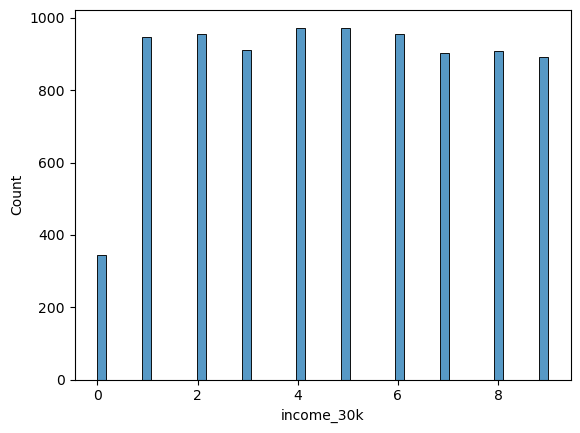

In [31]:
sns.histplot(df.income_30k, bins=50)

In [32]:
df.isnull().sum()

patient_id                         0
age                                0
sex                                0
cholesterol                        0
heart_rate                         0
diabetes                           0
family_history                     0
smoking                            0
obesity                            0
alcohol_consumption                0
exercise_hours_per_week            0
diet                               0
previous_heart_problems            0
medication_use                     0
stress_level                       0
sedentary_hours_per_day            0
bmi                                0
triglycerides                      0
physical_activity_days_per_week    0
sleep_hours_per_day                0
country                            0
continent                          0
hemisphere                         0
heart_attack_risk                  0
blood_pressure_min                 0
blood_pressure_max                 0
income_30k                         0
d

In [33]:
strings=df.dtypes[df.dtypes=='object'].index
strings

Index(['patient_id', 'sex', 'diet', 'country', 'continent', 'hemisphere'], dtype='object')

In [34]:
df['family_history']

0       0
1       1
2       0
3       1
4       1
       ..
8758    1
8759    0
8760    1
8761    0
8762    1
Name: family_history, Length: 8763, dtype: int64

In [35]:
round(df['cholesterol'][9]/10)*10, df['cholesterol'][9]

(250, 248)

In [36]:
df['bmi'][7],df['bmi'][7].round(1),df['bmi'][7].round()

(22.2218617394038, 22.2, 22.0)

In [37]:
cholesterol = []
triglycerides = []
bmi = []

for i in range(0,len(df)): 
    cholesterol.append(round(df['cholesterol'][i]/10)*10)
    triglycerides.append(round(df['triglycerides'][i]/10)*10)
    bmi.append(int(df['bmi'][i].round()))
    
df['cholesterol'] = cholesterol
df['triglycerides'] = cholesterol
df['bmi']= bmi

In [38]:
columns = df.columns
for col in columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

patient_id
['bmw7812' 'cze1114' 'bni9906' 'jln3497' 'gfo8847']
8763

age
[67 21 84 66 54]
73

sex
['male' 'female']
2

cholesterol
[210 390 320 380 300]
29

heart_rate
[72 98 73 93 48]
71

diabetes
[0 1]
2

family_history
[0 1]
2

smoking
[1 0]
2

obesity
[0 1]
2

alcohol_consumption
[0 1]
2

exercise_hours_per_week
[ 4  2 10  6  1]
21

diet
['average' 'unhealthy' 'healthy']
3

previous_heart_problems
[0 1]
2

medication_use
[0 1]
2

stress_level
[9 1 6 2 7]
10

sedentary_hours_per_day
[7 5 9 8 2]
13

bmi
[31 27 28 36 22]
23

triglycerides
[210 390 320 380 300]
29

physical_activity_days_per_week
[0 1 4 3 5]
8

sleep_hours_per_day
[ 6  7  4  5 10]
7

country
['argentina' 'canada' 'france' 'thailand' 'germany']
20

continent
['south_america' 'north_america' 'europe' 'asia' 'africa']
6

hemisphere
['southern_hemisphere' 'northern_hemisphere']
2

heart_attack_risk
[0 1]
2

blood_pressure_min
[ 88  93  99 100  86]
51

blood_pressure_max
[158 165 174 163  91]
91

income_30k
[8 9 7 4 5]
10



In [39]:
df.dtypes

patient_id                         object
age                                 int64
sex                                object
cholesterol                         int64
heart_rate                          int64
diabetes                            int64
family_history                      int64
smoking                             int64
obesity                             int64
alcohol_consumption                 int64
exercise_hours_per_week             int64
diet                               object
previous_heart_problems             int64
medication_use                      int64
stress_level                        int64
sedentary_hours_per_day             int64
bmi                                 int64
triglycerides                       int64
physical_activity_days_per_week     int64
sleep_hours_per_day                 int64
country                            object
continent                          object
hemisphere                         object
heart_attack_risk                 

In [40]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,8753,8754,8755,8756,8757,8758,8759,8760,8761,8762
patient_id,bmw7812,cze1114,bni9906,jln3497,gfo8847,zoo7941,wyv0966,xxm0972,xcq5937,ftj5456,...,nvc8704,lzm3606,kqr8949,bue0416,ydx2478,msv9918,qsv6764,xka5925,epe6801,zwn9666
age,67,21,21,84,66,54,90,84,20,43,...,82,80,25,22,59,60,28,47,36,25
sex,male,male,female,male,male,female,male,male,male,female,...,male,female,male,male,female,male,female,male,male,female
cholesterol,210,390,320,380,320,300,360,220,140,250,...,310,380,310,350,380,120,120,250,180,360
heart_rate,72,98,72,73,93,48,84,107,68,55,...,87,91,78,108,99,61,73,105,60,75
diabetes,0,1,1,1,1,1,0,0,1,0,...,0,1,0,0,0,1,1,0,1,1
family_history,0,1,0,1,1,1,0,0,0,1,...,1,1,1,1,1,1,0,1,0,1
smoking,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0
obesity,0,1,0,0,1,0,0,1,1,1,...,1,0,0,0,1,0,1,1,0,0
alcohol_consumption,0,1,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,0,1,0,1


In [41]:
df['heart_attack_risk'].mean()

0.3582106584503024

## Setting up the validation framework :

In [42]:
df.heart_attack_risk.value_counts()

0    5624
1    3139
Name: heart_attack_risk, dtype: int64

### Split df :

In [43]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [44]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1) 

In [45]:
len(df), len(df_full_train), len(df_test), len(df_val), len(df_train)

(8763, 7010, 1753, 1753, 5257)

In [46]:
len(df_train)+len(df_val)==len(df_full_train), len(df_full_train)+len(df_test)==len(df)

(True, True)

In [47]:
df_train.head()

,patient_id,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,...,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk,blood_pressure_min,blood_pressure_max,income_30k
7969,dyf5450,89,male,280,60,0,1,1,0,0,...,280,0,4,south_korea,asia,northern_hemisphere,1,88,164,3
4685,qha1490,61,male,140,95,1,1,1,0,1,...,140,7,4,germany,europe,northern_hemisphere,1,86,115,2
8068,xmx0258,89,male,400,64,0,1,1,0,0,...,400,2,8,south_africa,africa,southern_hemisphere,1,104,114,9
7100,idq7248,75,male,360,80,1,0,1,0,1,...,360,4,10,united_states,north_america,northern_hemisphere,0,96,113,9
5027,mpp9335,42,female,350,90,1,1,1,0,0,...,350,2,10,france,europe,northern_hemisphere,1,101,121,9


### Index reset :

In [48]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [49]:
df_train.head()

,patient_id,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,...,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk,blood_pressure_min,blood_pressure_max,income_30k
0,dyf5450,89,male,280,60,0,1,1,0,0,...,280,0,4,south_korea,asia,northern_hemisphere,1,88,164,3
1,qha1490,61,male,140,95,1,1,1,0,1,...,140,7,4,germany,europe,northern_hemisphere,1,86,115,2
2,xmx0258,89,male,400,64,0,1,1,0,0,...,400,2,8,south_africa,africa,southern_hemisphere,1,104,114,9
3,idq7248,75,male,360,80,1,0,1,0,1,...,360,4,10,united_states,north_america,northern_hemisphere,0,96,113,9
4,mpp9335,42,female,350,90,1,1,1,0,0,...,350,2,10,france,europe,northern_hemisphere,1,101,121,9


### Popolate prediction vectors y :

In [50]:
y_train = df_train.heart_attack_risk.values
y_val = df_val.heart_attack_risk.values
y_test = df_test.heart_attack_risk.values

### Delete prediction from features data :

In [51]:
del df_train['heart_attack_risk']  
del df_val['heart_attack_risk']
del df_test['heart_attack_risk']

### Verify :

In [52]:
y_val

array([0, 1, 1, ..., 0, 0, 1])

In [54]:
df_train.head()

,patient_id,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,...,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,blood_pressure_min,blood_pressure_max,income_30k
0,dyf5450,89,male,280,60,0,1,1,0,0,...,21,280,0,4,south_korea,asia,northern_hemisphere,88,164,3
1,qha1490,61,male,140,95,1,1,1,0,1,...,33,140,7,4,germany,europe,northern_hemisphere,86,115,2
2,xmx0258,89,male,400,64,0,1,1,0,0,...,25,400,2,8,south_africa,africa,southern_hemisphere,104,114,9
3,idq7248,75,male,360,80,1,0,1,0,1,...,33,360,4,10,united_states,north_america,northern_hemisphere,96,113,9
4,mpp9335,42,female,350,90,1,1,1,0,0,...,32,350,2,10,france,europe,northern_hemisphere,101,121,9


## Explorative Data Analysis :

In [55]:
df_full_train.head()

,patient_id,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,...,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk,blood_pressure_min,blood_pressure_max,income_30k
7361,hrm3348,54,male,260,77,0,1,1,1,1,...,260,0,8,argentina,south_america,southern_hemisphere,1,67,165,7
54,yod3294,31,male,240,92,1,1,1,1,1,...,240,7,9,united_states,north_america,northern_hemisphere,0,80,100,8
4133,knj1597,27,male,150,106,0,1,1,1,1,...,150,7,9,canada,north_america,northern_hemisphere,0,75,138,6
7011,idg3112,74,male,320,82,0,1,1,0,0,...,320,7,10,united_kingdom,europe,northern_hemisphere,0,75,107,3
4230,gwn9220,76,male,150,42,1,0,1,0,1,...,150,5,8,vietnam,asia,northern_hemisphere,0,85,103,7


In [56]:
df_full_train = df_full_train.reset_index(drop=True) 

In [57]:
df_full_train.isnull().sum()

patient_id                         0
age                                0
sex                                0
cholesterol                        0
heart_rate                         0
diabetes                           0
family_history                     0
smoking                            0
obesity                            0
alcohol_consumption                0
exercise_hours_per_week            0
diet                               0
previous_heart_problems            0
medication_use                     0
stress_level                       0
sedentary_hours_per_day            0
bmi                                0
triglycerides                      0
physical_activity_days_per_week    0
sleep_hours_per_day                0
country                            0
continent                          0
hemisphere                         0
heart_attack_risk                  0
blood_pressure_min                 0
blood_pressure_max                 0
income_30k                         0
d

### Observe the target variable :

In [58]:
df_full_train.heart_attack_risk.value_counts()

0    4482
1    2528
Name: heart_attack_risk, dtype: int64

In [59]:
df_full_train.heart_attack_risk.value_counts(normalize=True) 

0    0.639372
1    0.360628
Name: heart_attack_risk, dtype: float64

In [60]:
global_heart_attack_risk_rate = df_full_train.heart_attack_risk.mean()
round(global_heart_attack_risk_rate, 2) # %

0.36

In [61]:
df_full_train.columns

Index(['patient_id', 'age', 'sex', 'cholesterol', 'heart_rate', 'diabetes',
       'family_history', 'smoking', 'obesity', 'alcohol_consumption',
       'exercise_hours_per_week', 'diet', 'previous_heart_problems',
       'medication_use', 'stress_level', 'sedentary_hours_per_day', 'bmi',
       'triglycerides', 'physical_activity_days_per_week',
       'sleep_hours_per_day', 'country', 'continent', 'hemisphere',
       'heart_attack_risk', 'blood_pressure_min', 'blood_pressure_max',
       'income_30k'],
      dtype='object')

In [62]:
df_full_train.dtypes

patient_id                         object
age                                 int64
sex                                object
cholesterol                         int64
heart_rate                          int64
diabetes                            int64
family_history                      int64
smoking                             int64
obesity                             int64
alcohol_consumption                 int64
exercise_hours_per_week             int64
diet                               object
previous_heart_problems             int64
medication_use                      int64
stress_level                        int64
sedentary_hours_per_day             int64
bmi                                 int64
triglycerides                       int64
physical_activity_days_per_week     int64
sleep_hours_per_day                 int64
country                            object
continent                          object
hemisphere                         object
heart_attack_risk                 

In [63]:
numerical = ['age','cholesterol','heart_rate','diabetes',
             'family_history','smoking','obesity',
             'alcohol_consumption','exercise_hours_per_week',
             'previous_heart_problems','medication_use',
             'stress_level','sedentary_hours_per_day',
             'bmi','triglycerides','physical_activity_days_per_week',
             'sleep_hours_per_day','blood_pressure_min',
             'blood_pressure_max','income_30k'
            ]

In [64]:
categorical = ['sex','diet','country','continent','hemisphere']

In [65]:
numerical

['age',
 'cholesterol',
 'heart_rate',
 'diabetes',
 'family_history',
 'smoking',
 'obesity',
 'alcohol_consumption',
 'exercise_hours_per_week',
 'previous_heart_problems',
 'medication_use',
 'stress_level',
 'sedentary_hours_per_day',
 'bmi',
 'triglycerides',
 'physical_activity_days_per_week',
 'sleep_hours_per_day',
 'blood_pressure_min',
 'blood_pressure_max',
 'income_30k']

In [66]:
categorical

['sex', 'diet', 'country', 'continent', 'hemisphere']

In [67]:
df_full_train[numerical].head()

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,blood_pressure_min,blood_pressure_max,income_30k
0,54,260,77,0,1,1,1,1,1,0,1,4,1,33,260,0,8,67,165,7
1,31,240,92,1,1,1,1,1,2,0,1,2,7,31,240,7,9,80,100,8
2,27,150,106,0,1,1,1,1,6,1,1,8,5,37,150,7,9,75,138,6
3,74,320,82,0,1,1,0,0,7,0,0,8,12,19,320,7,10,75,107,3
4,76,150,42,1,0,1,0,1,7,0,1,8,1,21,150,5,8,85,103,7


In [68]:
df_full_train[categorical].head()

,sex,diet,country,continent,hemisphere
0,male,unhealthy,argentina,south_america,southern_hemisphere
1,male,unhealthy,united_states,north_america,northern_hemisphere
2,male,average,canada,north_america,northern_hemisphere
3,male,average,united_kingdom,europe,northern_hemisphere
4,male,healthy,vietnam,asia,northern_hemisphere


In [69]:
df_full_train[categorical].nunique()

sex            2
diet           3
country       20
continent      6
hemisphere     2
dtype: int64

## Churn rate and risk ratio :

In [70]:
global_heart_attack_risk_rate.round(2)

0.36

In [71]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).heart_attack_risk.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_heart_attack_risk_rate
    df_group['risk'] = df_group['mean'] / global_heart_attack_risk_rate
    display(df_group)
    print()

sex


,mean,count,diff,risk
sex,,,,
female,0.361571,2113,0.000944,1.002616
male,0.360221,4897,-0.000407,0.998871



diet


,mean,count,diff,risk
diet,,,,
average,0.348142,2341,-0.012486,0.965377
healthy,0.370244,2339,0.009616,1.026665
unhealthy,0.363519,2330,0.002892,1.008018



country


,mean,count,diff,risk
country,,,,
argentina,0.367292,373,0.006665,1.018480
australia,0.374317,366,0.013689,1.037960
brazil,0.366667,360,0.006039,1.016746
canada,0.383523,352,0.022895,1.063487
china,0.363889,360,0.003261,1.009043
colombia,0.378299,341,0.017671,1.049002
france,0.365714,350,0.005087,1.014105
germany,0.341969,386,-0.018659,0.948260
india,0.320635,315,-0.039993,0.889102



continent


,mean,count,diff,risk
continent,,,,
africa,0.357542,716,-0.003086,0.991443
asia,0.358627,2069,-0.002000,0.994453
australia,0.368046,701,0.007418,1.020570
europe,0.345475,1757,-0.015152,0.957983
north_america,0.385281,693,0.024654,1.068363
south_america,0.370577,1074,0.009950,1.027590



hemisphere


,mean,count,diff,risk
hemisphere,,,,
northern_hemisphere,0.365212,4559,0.004584,1.012711
southern_hemisphere,0.352101,2451,-0.008526,0.976357


####  These values are very similar, there are some interesting difference only in relation with the country 

## Mutual information : order categorical variable for importance

In [72]:
(mutual_info_score(df_full_train.heart_attack_risk, df_full_train.hemisphere)).round(4)

0.0001

In [73]:
def mutual_info_heart_attack_risk_score(series):
    return (mutual_info_score(series, df_full_train.heart_attack_risk)).round(4)

In [74]:
mi = df_full_train[categorical].apply(mutual_info_heart_attack_risk_score) 
mi.sort_values(ascending=False)

country       0.0013
continent     0.0003
diet          0.0002
hemisphere    0.0001
sex           0.0000
dtype: float64

### Poorly related categorical variable

## Correlation : order numerical variable for importance

In [75]:
df_full_train[numerical].T

,0,1,2,3,4,5,6,7,8,9,...,7000,7001,7002,7003,7004,7005,7006,7007,7008,7009
age,54,31,27,74,76,59,76,32,36,34,...,66,59,37,74,63,29,70,79,50,75
cholesterol,260,240,150,320,150,390,380,400,360,260,...,360,200,330,280,300,400,280,140,350,390
heart_rate,77,92,106,82,42,65,100,109,63,44,...,84,82,68,58,77,94,88,77,68,51
diabetes,0,1,0,0,1,0,0,0,0,1,...,0,1,1,0,1,0,0,1,1,0
family_history,1,1,1,1,0,1,0,1,1,0,...,1,0,1,0,1,0,0,0,1,1
smoking,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,0,1,1,1,1
obesity,1,1,1,0,0,0,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
alcohol_consumption,1,1,1,0,1,1,1,0,0,1,...,0,1,1,1,1,1,1,0,1,0
exercise_hours_per_week,1,2,6,7,7,10,10,6,4,12,...,7,5,1,7,8,20,11,18,5,12
previous_heart_problems,0,0,1,0,0,0,1,0,1,0,...,1,0,0,0,1,1,0,1,1,0


In [76]:
corr = df_full_train[numerical].corrwith(df_full_train.heart_attack_risk).abs()
corr.sort_values(ascending=False)

sleep_hours_per_day                0.032389
diabetes                           0.025089
income_30k                         0.022371
exercise_hours_per_week            0.018017
age                                0.017667
alcohol_consumption                0.017034
blood_pressure_max                 0.015751
cholesterol                        0.014541
triglycerides                      0.014541
obesity                            0.013568
smoking                            0.009023
blood_pressure_min                 0.008148
heart_rate                         0.005536
family_history                     0.004395
bmi                                0.003941
sedentary_hours_per_day            0.003776
stress_level                       0.001622
physical_activity_days_per_week    0.001617
medication_use                     0.000380
previous_heart_problems            0.000283
dtype: float64

In [77]:
(df_full_train[df_full_train.sleep_hours_per_day < 6].heart_attack_risk.mean())

0.37493658041603245

In [78]:
df_full_train[(df_full_train.sleep_hours_per_day > 6) & (df_full_train.sleep_hours_per_day <= 8)].heart_attack_risk.mean()

0.36720667648502703

In [79]:
(df_full_train[df_full_train.sleep_hours_per_day > 8].heart_attack_risk.mean())

0.33383458646616543

In [80]:
(df_full_train[df_full_train.diabetes==0].heart_attack_risk.mean())

0.34398340248962656

In [81]:
(df_full_train[df_full_train.diabetes==1].heart_attack_risk.mean())

0.36934782608695654

In [82]:
global_heart_attack_risk_rate

0.3606276747503566

## Prepare the feature matrix :

In [83]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
train_dicts[0]

{'sex': 'male',
 'diet': 'unhealthy',
 'country': 'south_korea',
 'continent': 'asia',
 'hemisphere': 'northern_hemisphere',
 'age': 89,
 'cholesterol': 280,
 'heart_rate': 60,
 'diabetes': 0,
 'family_history': 1,
 'smoking': 1,
 'obesity': 0,
 'alcohol_consumption': 0,
 'exercise_hours_per_week': 7,
 'previous_heart_problems': 0,
 'medication_use': 0,
 'stress_level': 7,
 'sedentary_hours_per_day': 5,
 'bmi': 21,
 'triglycerides': 280,
 'physical_activity_days_per_week': 0,
 'sleep_hours_per_day': 4,
 'blood_pressure_min': 88,
 'blood_pressure_max': 164,
 'income_30k': 3}

In [84]:
dv = DictVectorizer(sparse=False)

In [85]:
X_train = dv.fit_transform(train_dicts)
X_train.shape

(5257, 53)

In [86]:
df_train.shape

(5257, 26)

In [87]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [88]:
X_val = dv.transform(val_dicts)

## Logistic regression :

In [89]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [90]:
X_train.shape, y_train.shape

((5257, 53), (5257,))

In [91]:
model = LogisticRegression(max_iter=1000)

In [92]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [93]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.31517052, 0.41896978, 0.42180839, ..., 0.26915767, 0.3413154 ,
       0.3485808 ])

In [94]:
heart_attack = y_pred >= 0.5
heart_attack

array([False, False, False, ..., False, False, False])

In [95]:
score = (y_val == heart_attack).mean()
score

0.6280661722760981

In [96]:
roc_auc_score(y_val, y_pred).round(3)

0.522

### Looking inside the model :
##### Weight of the features

In [97]:
w0 = model.intercept_[0]
sigmoid(w0)

0.4737698029095377

In [98]:
w = model.coef_[0]
dict(zip(dv.get_feature_names_out(),w.round(3)))

{'age': 0.002,
 'alcohol_consumption': -0.072,
 'blood_pressure_max': 0.0,
 'blood_pressure_min': -0.002,
 'bmi': -0.004,
 'cholesterol': 0.0,
 'continent=africa': -0.022,
 'continent=asia': -0.092,
 'continent=australia': 0.068,
 'continent=europe': -0.085,
 'continent=north_america': 0.057,
 'continent=south_america': -0.029,
 'country=argentina': -0.022,
 'country=australia': 0.104,
 'country=brazil': 0.019,
 'country=canada': 0.017,
 'country=china': 0.041,
 'country=colombia': -0.027,
 'country=france': 0.146,
 'country=germany': -0.134,
 'country=india': -0.144,
 'country=italy': -0.183,
 'country=japan': -0.159,
 'country=new_zealand': -0.036,
 'country=nigeria': 0.068,
 'country=south_africa': -0.09,
 'country=south_korea': 0.276,
 'country=spain': 0.121,
 'country=thailand': -0.04,
 'country=united_kingdom': -0.035,
 'country=united_states': 0.04,
 'country=vietnam': -0.067,
 'diabetes': 0.117,
 'diet=average': -0.086,
 'diet=healthy': 0.021,
 'diet=unhealthy': -0.038,
 'exerc

## Train the final model - logistic regression :

In [99]:
dicts_df_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [100]:
#dicts_df_full_train

In [101]:
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dicts_df_full_train)
y_full_train = df_full_train.heart_attack_risk.values

In [102]:
model = LogisticRegression(max_iter=1000)
model.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=1000)

In [103]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
#dicts_test

In [104]:
X_test = dv.transform(dicts_test)

In [105]:
y_pred = model.predict_proba(X_test)[:,1]

In [106]:
accuracy_score(y_test,y_pred>=0.5)

0.6508841985168283

### Test the model on one  record :

In [107]:
patient = dicts_test[99] # pick up a random record 
patient

{'sex': 'female',
 'diet': 'unhealthy',
 'country': 'canada',
 'continent': 'north_america',
 'hemisphere': 'northern_hemisphere',
 'age': 61,
 'cholesterol': 260,
 'heart_rate': 52,
 'diabetes': 0,
 'family_history': 0,
 'smoking': 1,
 'obesity': 1,
 'alcohol_consumption': 1,
 'exercise_hours_per_week': 6,
 'previous_heart_problems': 0,
 'medication_use': 0,
 'stress_level': 2,
 'sedentary_hours_per_day': 8,
 'bmi': 25,
 'triglycerides': 260,
 'physical_activity_days_per_week': 6,
 'sleep_hours_per_day': 4,
 'blood_pressure_min': 81,
 'blood_pressure_max': 163,
 'income_30k': 1}

In [108]:
X_small = dv.transform([patient]) 

In [109]:
model.predict_proba(X_small) [0,1]

0.36936839630248214

In [110]:
y_test[99] 

0

## Accuracy :

In [111]:
accuracy_score(y_val,y_pred>=0.5)

0.6286366229321164

In [112]:
scores = []
thresholds =  np.linspace(0 ,1 ,21)

In [113]:
for t in thresholds:
    score = accuracy_score(y_val,y_pred >= t)
    print('%.2f %.3f' % (t,score))
    scores.append(score)

0.00 0.372
0.05 0.372
0.10 0.372
0.15 0.372
0.20 0.372
0.25 0.372
0.30 0.395
0.35 0.481
0.40 0.587
0.45 0.622
0.50 0.629
0.55 0.628
0.60 0.628
0.65 0.628
0.70 0.628
0.75 0.628
0.80 0.628
0.85 0.628
0.90 0.628
0.95 0.628
1.00 0.628


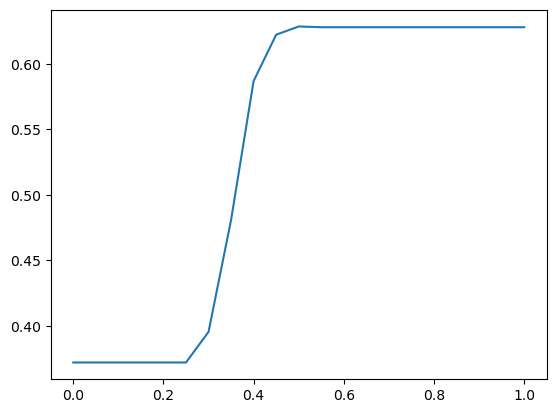

In [114]:
plt.plot(thresholds, scores)

In [115]:
from collections import Counter

In [116]:
score = accuracy_score(y_val,y_pred >= 0.5)
score

0.6286366229321164

### AUC score :

In [117]:
roc_auc_score(y_val, y_pred)

0.507979360648156

In [118]:
# it is pretty low!

### Let's try with cross validation :

In [119]:
len(df_train), len(y_train)

(5257, 5257)

In [121]:
def train(df_train, y_train, C=1.0):
# convert dataFrame in list of dictionary
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=10000) 
    model.fit(X_train, y_train) # smaller values of C means stronger regularization
    
    return dv, model

In [122]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [123]:
kfold = KFold(n_splits=3, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.heart_attack_risk.values
    y_val = df_val.heart_attack_risk.values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)


0it [00:00, ?it/s]

In [124]:
scores

[0.5211009247006807, 0.49797522722971355, 0.5222169003560249]

In [125]:
print('%.3f +- %.3f' %(np.mean(scores), np.std(scores)))

0.514 +- 0.011


In [126]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.heart_attack_risk.values
        y_val = df_val.heart_attack_risk.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    
    print('C=%s %.3f +- %.3f' %(C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.513 +- 0.012
C=0.01 0.512 +- 0.009
C=0.1 0.512 +- 0.007
C=0.5 0.512 +- 0.006
C=1 0.512 +- 0.007
C=5 0.511 +- 0.006
C=10 0.512 +- 0.005


## Train final model - lr :

In [127]:
dv, model = train(df_full_train, df_full_train.heart_attack_risk.values, C=1.0)
y_pred = predict(df_test, dv, model)
auc = roc_auc_score(y_test, y_pred)
auc.round(2)

0.48

In [128]:
y_pred, y_test

(array([0.38289605, 0.33418597, 0.3980647 , ..., 0.3529211 , 0.37875723,
        0.33425287]),
 array([1, 0, 0, ..., 0, 0, 1]))

In [129]:
auc = roc_auc_score(y_test, y_pred)
auc.round(2)

0.48

In [130]:
# very poor correlation in the data

# Try with different models, decision trees :

df.describe().round(2)

In [131]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [132]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [133]:
y_train = df_train.heart_attack_risk.values
y_val = df_val.heart_attack_risk.values
y_test = df_val.heart_attack_risk.values

In [134]:
del df_train['heart_attack_risk']
del df_val['heart_attack_risk']
del df_test['heart_attack_risk']

In [135]:
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,5247,5248,5249,5250,5251,5252,5253,5254,5255,5256
patient_id,xec3315,nur0492,qmv8571,nnj7289,quo6782,onl5969,pzo0044,shw2926,etf0846,sqe8133,...,hqj0627,jds3385,nhx8643,pwo8077,qfm2664,jtc9113,hir1232,dlf2625,zsf7284,uir3262
age,87,29,80,73,87,31,39,58,83,28,...,41,30,31,42,58,39,25,75,79,55
sex,male,male,male,male,female,female,female,male,female,female,...,male,male,female,male,male,male,male,male,female,male
cholesterol,260,140,210,280,230,330,220,300,380,340,...,290,230,340,190,320,320,360,310,390,220
heart_rate,84,83,109,64,81,106,41,50,92,105,...,84,40,42,47,40,67,70,84,44,80
diabetes,1,1,1,1,1,1,1,1,1,0,...,0,1,1,0,1,0,1,1,1,1
family_history,1,1,1,1,0,0,0,1,0,0,...,0,1,0,0,1,1,1,1,1,0
smoking,1,1,1,1,1,0,0,1,1,0,...,1,1,0,1,1,1,1,1,1,1
obesity,1,0,0,1,1,0,0,0,1,0,...,1,0,1,0,1,1,0,1,0,1
alcohol_consumption,0,0,0,1,1,0,1,1,1,1,...,1,0,0,1,0,0,1,1,1,1


In [136]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [137]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [138]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [139]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [140]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.5162994556131852

## Decision tree tuning parameters :

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

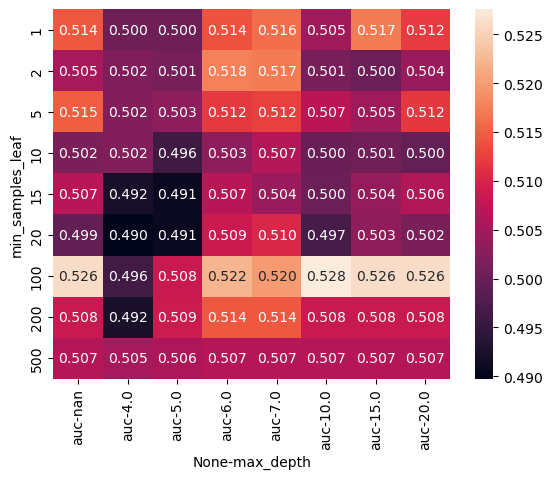

In [141]:
scores = []

for d in [4,5,6,7,10,15,20,None]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)    
    
        scores.append((d,s,auc))

columns = ['max_depth','min_samples_leaf','auc']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [142]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100)

In [143]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [144]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.5275751210939174

## Ensemble Random Forest :

In [145]:
rf = RandomForestClassifier(n_estimators=10, random_state=1) 
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [146]:
y_pred = rf.predict_proba(X_val)[:,1]

In [147]:
roc_auc_score(y_val, y_pred)

0.5110463371769043

In [148]:
scores = []

for d in [15, 20, 25]:

    for n in tqdm(range(10,201,10)):
        #print(n)

        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=d, # set max_depth
                                    random_state=1)         

        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

columns=['max_depth','n_estimators','auc']

df_scores= pd.DataFrame(scores, columns=columns)
df_scores.head()

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

,max_depth,n_estimators,auc
0,15,10,0.506910
1,15,20,0.506588
2,15,30,0.509692
3,15,40,0.506930
4,15,50,0.511282


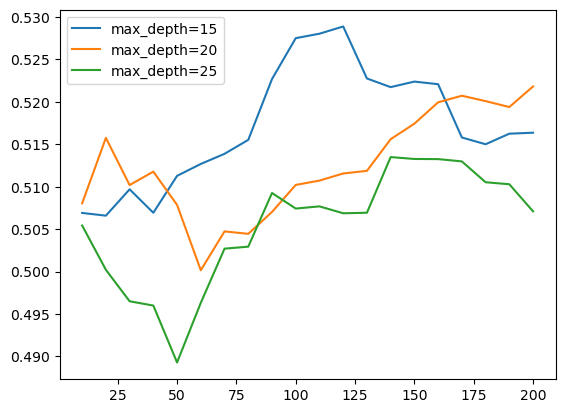

In [149]:
for d in [15, 20, 25]:
    df_subset=df_scores[df_scores.max_depth==d]
    plt.plot(df_subset.n_estimators, 
              df_subset.auc,
              label='max_depth=%d'%d)
plt.legend()   

In [150]:
max_depth = 15

In [151]:
scores = []

for s in [1,3,5,10,50]: #min_sample_leaf

    for n in tqdm(range(10,201,10)):
        #print(n)

        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=max_depth, 
                                    min_samples_leaf=s, 
                                    random_state=1)         

        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

columns=['min_samples_leaf','n_estimators','auc']
df_scores= pd.DataFrame(scores, columns=columns)
df_scores.head()

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

,min_samples_leaf,n_estimators,auc
0,1,10,0.506910
1,1,20,0.506588
2,1,30,0.509692
3,1,40,0.506930
4,1,50,0.511282


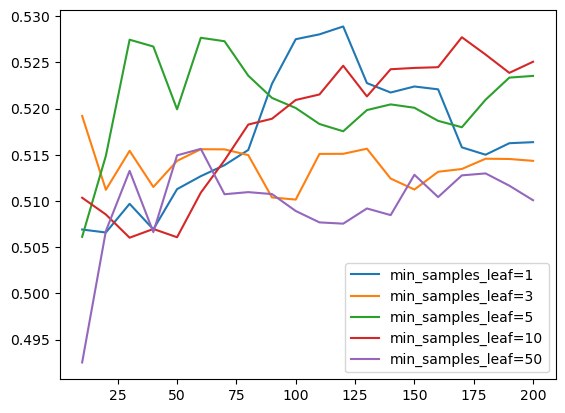

In [152]:
for s in [1,3,5,10,50]:
    df_subset=df_scores[df_scores.min_samples_leaf==s]
    plt.plot(df_subset.n_estimators, 
              df_subset.auc,
              label='min_samples_leaf=%d'%s)
plt.legend()   

In [153]:
min_sample_leaf = 1
n = 40
max_depth=6

In [154]:
rf = RandomForestClassifier(n_estimators=n, 
                            max_depth=max_depth,
                            min_samples_leaf=min_sample_leaf)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=40)

In [155]:
y_pred = rf.predict_proba(X_val)[:,1]

In [156]:
roc_auc_score(y_val, y_pred)

0.5052824095903525

## Xgboost :

In [157]:
dv.get_feature_names_out()

array(['age', 'alcohol_consumption', 'blood_pressure_max',
       'blood_pressure_min', 'bmi', 'cholesterol', 'continent=africa',
       'continent=asia', 'continent=australia', 'continent=europe',
       'continent=north_america', 'continent=south_america',
       'country=argentina', 'country=australia', 'country=brazil',
       'country=canada', 'country=china', 'country=colombia',
       'country=france', 'country=germany', 'country=india',
       'country=italy', 'country=japan', 'country=new_zealand',
       'country=nigeria', 'country=south_africa', 'country=south_korea',
       'country=spain', 'country=thailand', 'country=united_kingdom',
       'country=united_states', 'country=vietnam', 'diabetes',
       'diet=average', 'diet=healthy', 'diet=unhealthy',
       'exercise_hours_per_week', 'family_history', 'heart_rate',
       'hemisphere=northern_hemisphere', 'hemisphere=southern_hemisphere',
       'income_30k', 'medication_use', 'obesity',
       'physical_activity_days_pe

In [158]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.get_feature_names_out())
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.get_feature_names_out())

In [159]:
xgb_params = {
    'eta':0.3,                 
    'max_depth' :6,
    'min_child_weight': 1,
    
    'objective':'binary:logistic',
    'nthread':8,
    'seed':1,
    'verbosity':1                                    
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [160]:
y_pred = model.predict(dval)

In [161]:
roc_auc_score(y_val, y_pred)

0.5182169545772787

### Tuning Xgboost : 

In [162]:
def parse_xgb_output(output):
    results= []
   
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        results.append((it, train, val))
        
    columns = ['num_iteration','auc_train','auc_val']
    df_results = pd.DataFrame(results, columns=columns )    
        
    return df_results

In [163]:
watchlist = [(dtrain,'train'),(dval,'val')]

In [164]:
xgb_params = {
    'eta':0.3,               
    'max_depth' :6,
    'min_child_weight': 1,   
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1                               
}

model = xgb.train(xgb_params, dtrain,num_boost_round=200,verbose_eval=5,
                  evals= watchlist
                 )


[0]	train-auc:0.60291	val-auc:0.49018
[5]	train-auc:0.78336	val-auc:0.51209
[10]	train-auc:0.84992	val-auc:0.51569
[15]	train-auc:0.90330	val-auc:0.52717
[20]	train-auc:0.93612	val-auc:0.53002
[25]	train-auc:0.95555	val-auc:0.53134
[30]	train-auc:0.96955	val-auc:0.52374
[35]	train-auc:0.98092	val-auc:0.53193
[40]	train-auc:0.98644	val-auc:0.52548
[45]	train-auc:0.99195	val-auc:0.52541
[50]	train-auc:0.99494	val-auc:0.52756
[55]	train-auc:0.99658	val-auc:0.53341
[60]	train-auc:0.99824	val-auc:0.53226
[65]	train-auc:0.99894	val-auc:0.53340
[70]	train-auc:0.99934	val-auc:0.53520
[75]	train-auc:0.99959	val-auc:0.53324
[80]	train-auc:0.99971	val-auc:0.53157
[85]	train-auc:0.99981	val-auc:0.52849
[90]	train-auc:0.99989	val-auc:0.52651
[95]	train-auc:0.99992	val-auc:0.52428
[100]	train-auc:0.99994	val-auc:0.52538
[105]	train-auc:0.99998	val-auc:0.52585
[110]	train-auc:0.99998	val-auc:0.52400
[115]	train-auc:0.99999	val-auc:0.52355
[120]	train-auc:1.00000	val-auc:0.52274
[125]	train-auc:1.0000

## Tuning 'eta' parameter :

In [165]:
scores = {}
num_boost_round = 300

In [166]:
%%capture output

watchlist = [(dtrain,'train'),(dval,'val')]

xgb_params = {
    'eta':0.02,               
    'max_depth' :6,
    'min_child_weight': 1,   
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1                               
}

model = xgb.train(xgb_params, dtrain,num_boost_round=num_boost_round,verbose_eval=5,
                  evals= watchlist
                 )

In [167]:
key = 'eta=%s' % xgb_params['eta']

In [168]:
scores[key] = parse_xgb_output(output)

In [169]:
%%capture output

watchlist = [(dtrain,'train'),(dval,'val')]

xgb_params = {
    'eta':0.01,               
    'max_depth' :6,
    'min_child_weight': 1,   
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1                               
}

model = xgb.train(xgb_params, dtrain,num_boost_round=num_boost_round,verbose_eval=5,
                  evals= watchlist
                 )

In [170]:
key = 'eta=%s' % xgb_params['eta']

In [171]:
scores[key] = parse_xgb_output(output)

In [172]:
scores.keys()

dict_keys(['eta=0.02', 'eta=0.01'])

In [173]:
%%capture output

watchlist = [(dtrain,'train'),(dval,'val')]

xgb_params = {
    'eta':1.0,               
    'max_depth' :6,
    'min_child_weight': 1,   
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1                               
}

model = xgb.train(xgb_params, dtrain,num_boost_round=num_boost_round,verbose_eval=5,
                  evals= watchlist
                 )

In [174]:
key = 'eta=%s' % xgb_params['eta']

In [175]:
scores[key] = parse_xgb_output(output)

In [176]:
%%capture output

watchlist = [(dtrain,'train'),(dval,'val')]

xgb_params = {
    'eta':0.1,               
    'max_depth' :6,
    'min_child_weight': 1,   
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1                               
}

model = xgb.train(xgb_params, dtrain,num_boost_round=num_boost_round,verbose_eval=5,
                  evals= watchlist
                 )

In [177]:
key = 'eta=%s' % xgb_params['eta']

In [178]:
scores[key] = parse_xgb_output(output)

In [179]:
%%capture output

watchlist = [(dtrain,'train'),(dval,'val')]

xgb_params = {
    'eta':0.03,               
    'max_depth' :6,
    'min_child_weight': 1,   
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1                               
}

model = xgb.train(xgb_params, dtrain,num_boost_round=num_boost_round,verbose_eval=5,
                  evals= watchlist
                 )

In [180]:
key = 'eta=%s' % xgb_params['eta']

In [181]:
scores[key] = parse_xgb_output(output)

In [182]:
%%capture output

watchlist = [(dtrain,'train'),(dval,'val')]

xgb_params = {
    'eta':0.05,               
    'max_depth' :6,
    'min_child_weight': 1,   
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1                               
}

model = xgb.train(xgb_params, dtrain,num_boost_round=num_boost_round,verbose_eval=5,
                  evals= watchlist
                 )

In [183]:
key = 'eta=%s' % xgb_params['eta']

In [184]:
scores[key] = parse_xgb_output(output)

In [185]:
scores.keys()

dict_keys(['eta=0.02', 'eta=0.01', 'eta=1.0', 'eta=0.1', 'eta=0.03', 'eta=0.05'])

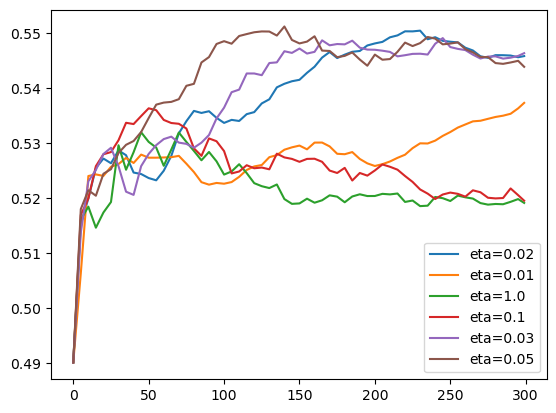

In [186]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iteration, df_scores.auc_val, label=key)
plt.legend()

In [187]:
eta = 0.05

### Tuning 'max_depth' parameter :

In [188]:
scores = {}

In [189]:
%%capture output 

watchlist = [(dtrain,'train'),(dval,'val')]

xgb_params = {
    'eta':eta,               
    'max_depth' :4,
    'min_child_weight': 1,   
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1                               
}

model = xgb.train(xgb_params, dtrain,num_boost_round=num_boost_round,verbose_eval=5,
                  evals= watchlist)

In [190]:
key = 'max_depth=%s' % xgb_params['max_depth']
scores[key] = parse_xgb_output(output)

In [191]:
%%capture output 

watchlist = [(dtrain,'train'),(dval,'val')]

xgb_params = {
    'eta':eta,               
    'max_depth' :5,
    'min_child_weight': 1,   
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1                               
}

model = xgb.train(xgb_params, dtrain,num_boost_round=num_boost_round,verbose_eval=5,
                  evals= watchlist)

In [192]:
key = 'max_depth=%s' % xgb_params['max_depth']
scores[key] = parse_xgb_output(output)

In [193]:
%%capture output 

watchlist = [(dtrain,'train'),(dval,'val')]

xgb_params = {
    'eta':eta,               
    'max_depth' :6,
    'min_child_weight': 1,   
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1                               
}

model = xgb.train(xgb_params, dtrain,num_boost_round=num_boost_round,verbose_eval=5,
                  evals= watchlist)

In [194]:
key = 'max_depth=%s' % xgb_params['max_depth']
scores[key] = parse_xgb_output(output)

In [195]:
%%capture output 

watchlist = [(dtrain,'train'),(dval,'val')]

xgb_params = {
    'eta':eta,               
    'max_depth' :3,
    'min_child_weight': 1,   
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1                               
}

model = xgb.train(xgb_params, dtrain,num_boost_round=num_boost_round,verbose_eval=5,
                  evals= watchlist)

In [196]:
key = 'max_depth=%s' % xgb_params['max_depth']
scores[key] = parse_xgb_output(output)

In [197]:
%%capture output 

watchlist = [(dtrain,'train'),(dval,'val')]

xgb_params = {
    'eta':eta,               
    'max_depth' :10,
    'min_child_weight': 1,   
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1                               
}

model = xgb.train(xgb_params, dtrain,num_boost_round=num_boost_round,verbose_eval=5,
                  evals= watchlist)

In [198]:
key = 'max_depth=%s' % xgb_params['max_depth']
scores[key] = parse_xgb_output(output)

In [199]:
scores.keys()

dict_keys(['max_depth=4', 'max_depth=5', 'max_depth=6', 'max_depth=3', 'max_depth=10'])

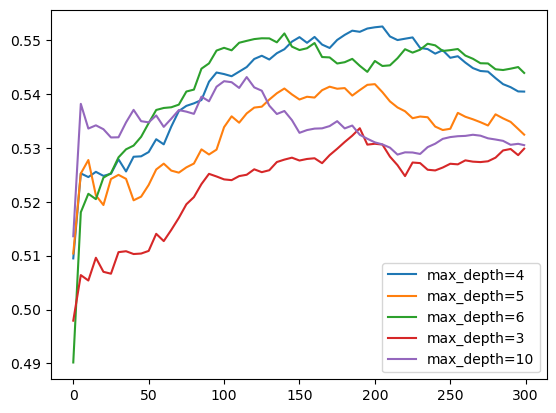

In [200]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iteration, df_scores.auc_val, label=key)
plt.legend()

In [201]:
max_depth = 6

### min_child_weight :

In [202]:
scores={}

In [203]:
%%capture output 

watchlist = [(dtrain,'train'),(dval,'val')]

xgb_params = {
    'eta':eta,               
    'max_depth':max_depth,
    'min_child_weight': 1,   
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1                               
}

model = xgb.train(xgb_params, dtrain,num_boost_round=num_boost_round,verbose_eval=5,
                  evals= watchlist)

In [204]:
key = 'min_child_weight=%s' % xgb_params['min_child_weight']
scores[key] = parse_xgb_output(output)

In [205]:
%%capture output 

watchlist = [(dtrain,'train'),(dval,'val')]

xgb_params = {
    'eta':eta,               
    'max_depth':max_depth,
    'min_child_weight': 10,   
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1                               
}

model = xgb.train(xgb_params, dtrain,num_boost_round=num_boost_round,verbose_eval=5,
                  evals= watchlist)

In [206]:
key = 'min_child_weight=%s' % xgb_params['min_child_weight']
scores[key] = parse_xgb_output(output)

In [207]:
%%capture output 

watchlist = [(dtrain,'train'),(dval,'val')]

xgb_params = {
    'eta':eta,               
    'max_depth':max_depth,
    'min_child_weight': 30,   
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1                               
}

model = xgb.train(xgb_params, dtrain,num_boost_round=num_boost_round,verbose_eval=5,
                  evals= watchlist)

In [208]:
key = 'min_child_weight=%s' % xgb_params['min_child_weight']
scores[key] = parse_xgb_output(output)

In [209]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30'])

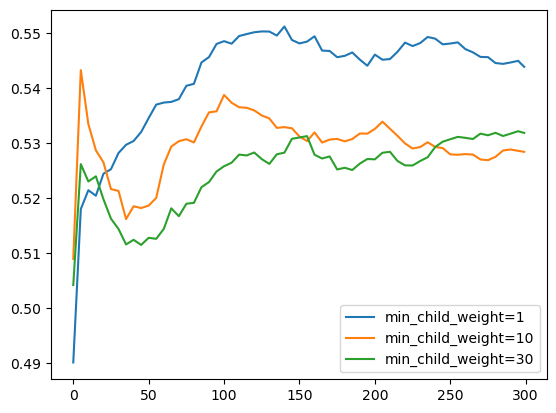

In [210]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iteration, df_scores.auc_val, label=key)
plt.legend()

In [211]:
min_child_weight = 1
num_boost_round = 125

### Deployng final Xgboost model :

In [212]:
eta, max_depth, min_child_weight, num_boost_round

(0.05, 6, 1, 125)

In [213]:
xgb_params = {
    'eta':0.05,               
    'max_depth' :6,
    'min_child_weight': 1,   
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'verbosity':1                               
}

model = xgb.train(xgb_params, dtrain,num_boost_round=125)

## Selecting final model :

#### Decision tree :

In [214]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100)

In [215]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [216]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred).round(3)

0.528

#### Random forest :

In [217]:
# rf parameters after tuning :

min_sample_leaf = 1
n = 40
max_depth=6

In [218]:
rf = RandomForestClassifier(n_estimators=n, 
                            max_depth=max_depth,
                            min_samples_leaf=min_sample_leaf)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=40)

In [219]:
y_pred = rf.predict_proba(X_val)[:,1]

In [220]:
roc_auc_score(y_val,y_pred).round(3)

0.514

#### Xgboost :

In [221]:
# xgboost parameters after tuning :

eta = 0.05
max_depth = 6
min_child_weight = 1
num_boost_round = 125

In [222]:
xgb_params = {
    'eta':eta,               
    'max_depth' : max_depth,
    'min_child_weight': min_child_weight,   
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'verbosity':1                               
}

model = xgb.train(xgb_params, dtrain,num_boost_round=num_boost_round)

In [223]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred).round(3)

0.55

In [224]:
def tpr_dfr_dataframe(y_val, y_pred):

    scores = []
    threshold = np.linspace (0, 1, 101)

    for t in threshold:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (actual_positive & predict_positive).sum() 
        tn = (actual_negative & predict_negative).sum() 
        fp = (actual_negative & predict_positive).sum() 
        fn = (actual_positive & predict_negative).sum() 

        scores.append((t, tp, fp, fn, tn))
        
    columns = ('threshold', 'tp', 'fp', 'fn', 'tn')
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.fn + df_scores.tp)
    df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)

    return df_scores

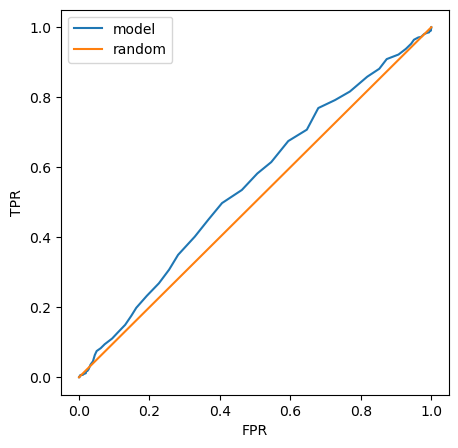

In [225]:
df_scores = tpr_dfr_dataframe(y_val, y_pred)

plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0,1],[0,1], label='random')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

### Our best model is Xgboost
### Here we train it on df_full_train dataset :

In [226]:
df_full_train = df_full_train.reset_index(drop=True)

In [227]:
y_full_train = df_full_train['heart_attack_risk']

In [228]:
del df_full_train['heart_attack_risk']

In [229]:
dicts_df_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

dv=DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_df_full_train)

dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [230]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=dv.get_feature_names_out())
dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names_out())

In [231]:
# xgboost parameters after tuning :

eta = 0.05
max_depth = 6
min_child_weight = 1
num_boost_round = 125

In [232]:
xgb_params = {
    'eta':0.05,               
    'max_depth' : 6,
    'min_child_weight': 1,   
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'verbosity':1                               
}

model = xgb.train(xgb_params, dfulltrain,num_boost_round = 125)

In [233]:
y_pred = model.predict(dtest)

In [234]:
roc_auc_score(y_test, y_pred).round(3)

0.523

In [235]:
# our model does not perform so much!

##  Export model :

In [236]:
output_file = 'model_xgb.bin'

In [237]:
f_out = open(output_file, 'wb')
pickle.dump((model, dv), f_out)   
f_out.close() 